In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
img=image.load_img("C:/Users/hp/Desktop/Computer Vision/basedata/train/malignant/SOB_M_DC-14-2523-40-010.png")

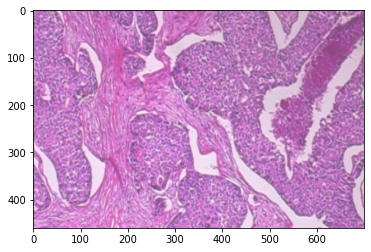

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("C:/Users/hp/Desktop/Computer Vision/basedata/train/malignant/SOB_M_DC-14-2523-40-010.png").shape

(460, 700, 3)

In [7]:
cv2.imread("C:/Users/hp/Desktop/Computer Vision/basedata/train/malignant/SOB_M_DC-14-2523-40-010.png")

array([[[188, 131, 194],
        [195, 125, 195],
        [193, 119, 191],
        ...,
        [198, 119, 192],
        [183, 113, 174],
        [157,  99, 153]],

       [[191, 134, 197],
        [207, 137, 207],
        [212, 136, 208],
        ...,
        [194, 113, 186],
        [172, 102, 163],
        [153,  95, 149]],

       [[192, 136, 201],
        [201, 134, 203],
        [208, 134, 206],
        ...,
        [192, 114, 185],
        [172, 103, 164],
        [150,  93, 144]],

       ...,

       [[213, 177, 231],
        [213, 174, 230],
        [222, 177, 234],
        ...,
        [215, 143, 209],
        [213, 145, 202],
        [212, 151, 201]],

       [[213, 171, 226],
        [217, 169, 228],
        [231, 176, 239],
        ...,
        [213, 140, 208],
        [215, 147, 206],
        [216, 155, 205]],

       [[207, 162, 218],
        [216, 161, 224],
        [220, 159, 225],
        ...,
        [198, 127, 193],
        [199, 133, 192],
        [205, 142, 192]]

In [6]:
train=ImageDataGenerator(rescale= 1/255)
validation=ImageDataGenerator(rescale= 1/255)

In [7]:
train_dataset = train.flow_from_directory("C:/Users/hp/Desktop/Computer Vision/basedata/train/",target_size=(64,64),batch_size=3,class_mode="binary")
validation_dataset=validation.flow_from_directory("C:/Users/hp/Desktop/Computer Vision/basedata/validation/",target_size=(64,64),batch_size=3,class_mode="binary")

Found 39 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'begnin': 0, 'malignant': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = "relu",input_shape=(64,64,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation = "relu"),
                                  ##
                                  tf.keras.layers.Dense(1,activation = "sigmoid")
                                  ])

In [10]:
model.compile(loss="binary_crossentropy",optimizer = RMSprop(learning_rate=0.001),metrics=["accuracy"])

In [14]:
model_fit = model.fit(train_dataset,steps_per_epoch = 3,epochs=30,validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 8s 2s/step - loss: 0.2517 - accuracy: 1.0000 - val_loss: 3.7566 - val_accuracy: 0.5238
Epoch 2/30
3/3 [==============================] - 1s 412ms/step - loss: 1.0485 - accuracy: 0.8889 - val_loss: 1.2210 - val_accuracy: 0.5238
Epoch 3/30
3/3 [==============================] - 2s 746ms/step - loss: 0.4369 - accuracy: 0.8889 - val_loss: 1.1330 - val_accuracy: 0.5238
Epoch 4/30
3/3 [==============================] - 2s 837ms/step - loss: 0.3982 - accuracy: 0.8889 - val_loss: 0.8903 - val_accuracy: 0.5238
Epoch 5/30
3/3 [==============================] - 1s 430ms/step - loss: 0.5729 - accuracy: 0.7778 - val_loss: 0.9426 - val_accuracy: 0.5238
Epoch 6/30
3/3 [==============================] - 1s 384ms/step - loss: 0.7066 - accuracy: 0.6667 - val_loss: 0.6968 - val_accuracy: 0.5238
Epoch 7/30
3/3 [==============================] - 1s 337ms/step - loss: 0.7953 - accuracy: 0.4444 - val_loss: 0.6905 - val_accuracy: 0.5238
Epoch 8/30
3/3 [=======

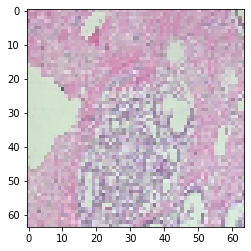

Affected


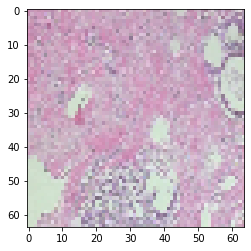

Affected


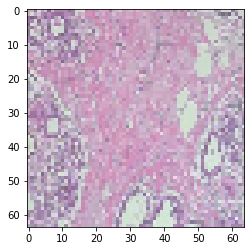

Affected


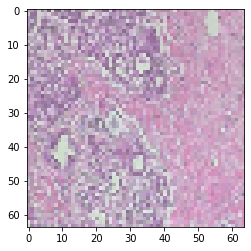

Affected


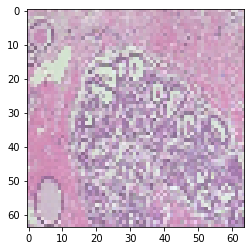

Affected


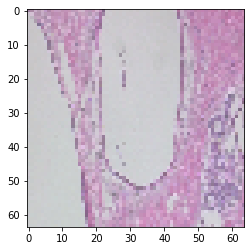

Affected


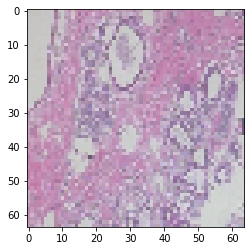

Affected


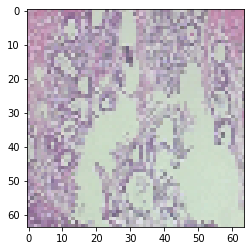

Affected


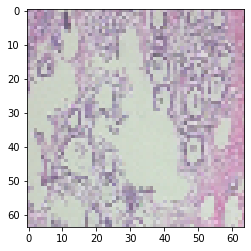

Affected


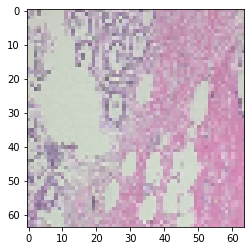

Affected


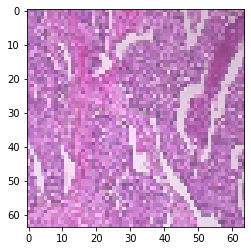

Affected


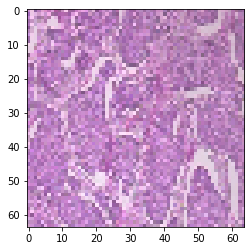

Affected


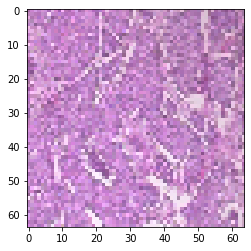

Affected


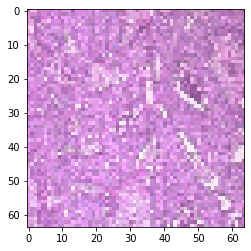

Affected


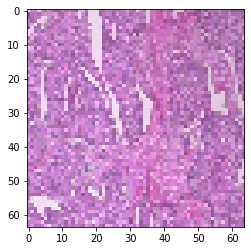

Affected


In [11]:
dir_path = "C:/Users/hp/Desktop/Computer Vision/basedata/test"
for i in os.listdir(dir_path ):
    img=image.load_img(dir_path+ '//'+ i,target_size=(64,64))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis =0)
    images=np.vstack([X])
    val=model.predict(images)
    if val == 0:
        print("Not Affected")
    else:
        print("Affected")